# imported package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import mean_squared_error

/home/sba/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sba/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sba/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sba/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarnin

# function

In [2]:
def format_data(prices, win_size, offset):

    nb_samples = len(prices)
    samples = []
    targets = []
    for n in range(nb_samples-win_size-offset):
        samples.append(prices[n:n+win_size])
        targets.append(prices[n+win_size+offset])
        
    samples = np.array(samples)
    samples = np.reshape(samples, (samples.shape[0], 1, samples.shape[1]))
    
    targets = np.array(targets)
        
    return samples, targets


def create_lstm_model(hidden_size, win_size):
    
    model = Sequential()
    model.add(LSTM(hidden_size, input_shape=(1,win_size)))
    model.add(Dense(1))
    model.summary()
    
    return model

# time series prediction

In [3]:
xls_file = "Crude Oil Prices Daily.xlsx"
df = pd.read_excel(xls_file)
df.head()

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


In [4]:
nb_rows = df.shape[0]
timestamps = []
closing_prices = []
counter=0

for n in range(nb_rows):
    value = df["Closing Value"][n]
    if not np.isnan(value):
        closing_prices.append(value)
        timestamps.append(df["Date"][n].timestamp())
        if counter==0:
            starting_timestamp=timestamps[0]
        timestamps[counter]-=starting_timestamp
        timestamps[counter]/=86400
        counter+=1
        

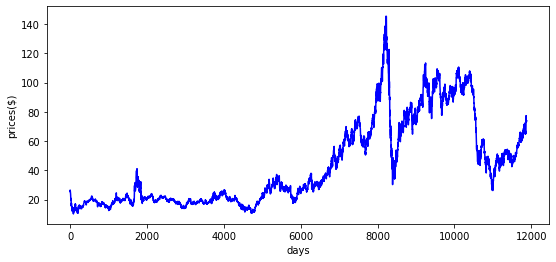

In [5]:
plt.figure(figsize=(9, 4))
plt.plot(timestamps, closing_prices,color='b')
plt.xlabel("days")
plt.ylabel("prices($)")
plt.show()

In [6]:
win_size = 10
offset = 5

samples, targets = format_data(closing_prices, win_size, offset)

nb_samples=np.shape(samples)[0]
nb_train = int(0.80*nb_samples)

samples_train = samples[0:nb_train,:,:]
targets_train = targets[0:nb_train]

samples_test = samples[nb_train:nb_samples,:,:]
targets_test = targets[nb_train:nb_samples]

In [7]:
hidden_size=128
model= create_lstm_model(hidden_size, win_size)
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
history=model.fit(samples_train, targets_train, epochs=200, batch_size=16, verbose=2)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               71168     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 71,297
Trainable params: 71,297
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/200
6560/6560 - 41s - loss: 1271.0601
Epoch 2/200
6560/6560 - 2s - loss: 704.9060
Epoch 3/200
6560/6560 - 2s - loss: 425.1067
Epoch 4/200
6560/6560 - 2s - loss: 259.9356
Epoch 5/200
6560/6560 - 2s - loss: 168.3988
Epoch 6/200
6560/6560 - 2s - loss: 112.9400
Epoch 7/200
6560/6560 - 2s - loss: 8

6560/6560 - 2s - loss: 11.3634
Epoch 157/200
6560/6560 - 2s - loss: 11.4665
Epoch 158/200
6560/6560 - 2s - loss: 11.0000
Epoch 159/200
6560/6560 - 2s - loss: 12.3822
Epoch 160/200
6560/6560 - 2s - loss: 11.6258
Epoch 161/200
6560/6560 - 2s - loss: 10.8450
Epoch 162/200
6560/6560 - 2s - loss: 11.2997
Epoch 163/200
6560/6560 - 2s - loss: 11.5394
Epoch 164/200
6560/6560 - 2s - loss: 13.2652
Epoch 165/200
6560/6560 - 2s - loss: 12.0358
Epoch 166/200
6560/6560 - 2s - loss: 11.7811
Epoch 167/200
6560/6560 - 2s - loss: 10.9706
Epoch 168/200
6560/6560 - 2s - loss: 11.7176
Epoch 169/200
6560/6560 - 2s - loss: 10.8825
Epoch 170/200
6560/6560 - 2s - loss: 11.4102
Epoch 171/200
6560/6560 - 2s - loss: 11.3522
Epoch 172/200
6560/6560 - 2s - loss: 10.3189
Epoch 173/200
6560/6560 - 2s - loss: 12.9987
Epoch 174/200
6560/6560 - 2s - loss: 13.6050
Epoch 175/200
6560/6560 - 2s - loss: 13.2009
Epoch 176/200
6560/6560 - 2s - loss: 11.1776
Epoch 177/200
6560/6560 - 2s - loss: 11.2407
Epoch 178/200
6560/6560 

In [8]:
train_pred = model.predict(samples_train)
test_pred = model.predict(samples_test)

In [9]:
train_score = np.sqrt(mean_squared_error(np.squeeze(targets_train), np.squeeze(train_pred)))
print('train score: %.2f RMSE' % (train_score))
test_score = np.sqrt(mean_squared_error(np.squeeze(targets_test), np.squeeze(test_pred)))
print('test score: %.2f RMSE' % (test_score))

train score: 3.47 RMSE
test score: 4.39 RMSE


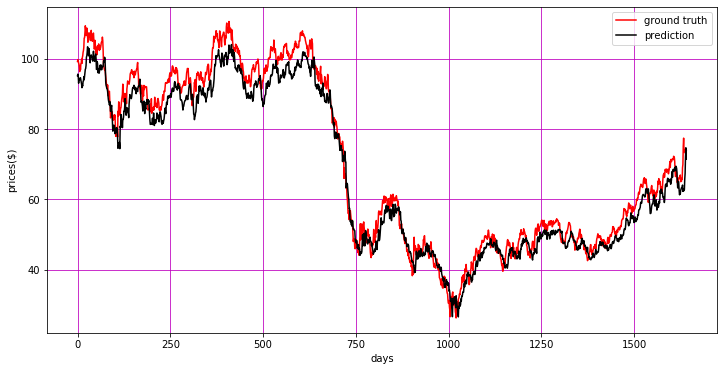

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(np.squeeze(targets_test),color='r',label="ground truth")
plt.plot( np.squeeze(test_pred),color='k',label="prediction")
plt.xlabel("days")
plt.ylabel("prices($)")
plt.legend()
plt.grid(color="m")
plt.show()